This dataset is for a telecommunication provider that has segmented its customers base by serive usage patterns, categorizing customers into four groups. And wonders if the demographic data can be used to predict group membership. the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The target field, called **custcat**, has four possible service categories that correspond to the four customer groups, as follows:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Our objective is to build a classifier to predict the service category for unknown cases. We will use a specific type of classification called K-nearest neighbors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
# print the values of the target variable
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [5]:
# Check correlation
df_cor = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
df_cor

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [6]:
#Seperate the indepedent and the target variable

X = df.drop('custcat', axis=1)
y = df.custcat

In [7]:
# Standardize/Normalize the independent variable
X_norm = StandardScaler().fit_transform(X)


In [8]:
# Train the model

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

# KNN Classification



In [9]:
k = 3
# Train Model and Predict
knn_classifier = KNeighborsClassifier(n_neighbors = k)
# Fit the model
knn_model = knn_classifier.fit(X_train, y_train)

In [10]:
# Predict 
yhat = knn_model.predict(X_test)

### Accuracy Evaluation

In [11]:
print("Test set accuracy: ", accuracy_score(y_test, yhat))

Test set accuracy:  0.315


The test accuracy is low because the K is low

In [29]:
# Increasing the value of K
k = 6
knn_model = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn_classifier = knn_model.fit(X_train, y_train)

# Predict the shape
y_hat = knn_classifier.predict(X_test)

# Check the accuracy of the test set
print(" Test set accuracy :", accuracy_score(y_test, y_hat))

 Test set accuracy : 0.395


In [18]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1, Ks+1):
    
    #Train model and predict
    knn_model_n = KNeighborsClassifier(n_neighbors= n).fit(X_train, y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

In [16]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

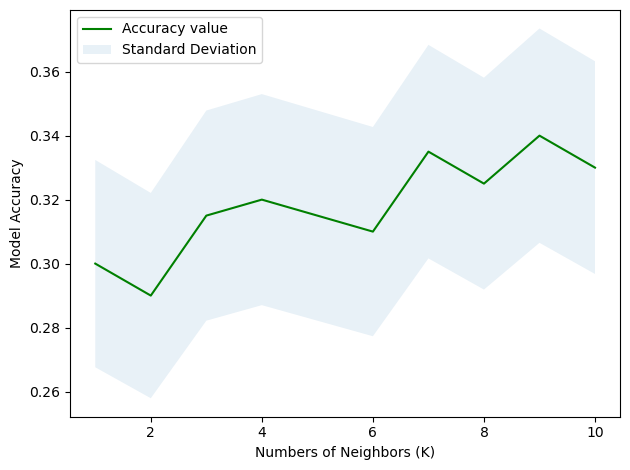

In [19]:
# Plot model accuracy for a different number of neighbors

plt.plot(range(1, Ks+1), acc, 'g')
plt.fill_between(range(1, Ks+1), acc - 1 * std_acc, acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Numbers of Neighbors (K)')
plt.tight_layout()
plt.show()

In [20]:
print (" The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

 The best accuracy was with 0.34 with k = 9


The graph is still rising, there may be an higher chance we get a better performance

In [21]:
# Lets try 30 as our new value for K

k = 30
knn_model_30 = KNeighborsClassifier(n_neighbors=k)
#Fit the model
knn_fit = knn_model_30.fit(X_train, y_train)

# Predict the shape
yhat_30 = knn_fit.predict(X_test)

#Check the accuracy of the test set
print("Test Set Accuracy :", accuracy_score(y_test, yhat_30))

Test Set Accuracy : 0.385


In [22]:
#Lets Try 100 as our new value for K

k = 100
#Build model
knn_model_100 = KNeighborsClassifier(n_neighbors=k)

#Fit the model
knn_fit_100 = knn_model_100.fit(X_train, y_train)

#predict the model
yhat_100 = knn_fit_100.predict(X_test)

#CHeck the accuracy of the model
print("Test Set Accuracy :", accuracy_score(y_test, yhat_100))

Test Set Accuracy : 0.31


The test set accuracy dropped.  
Plot the variation to find the perfect K

In [30]:
Ks  = 100
acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1, Ks):
    #Train the model and predict
    knn_model_n = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    #Predict
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

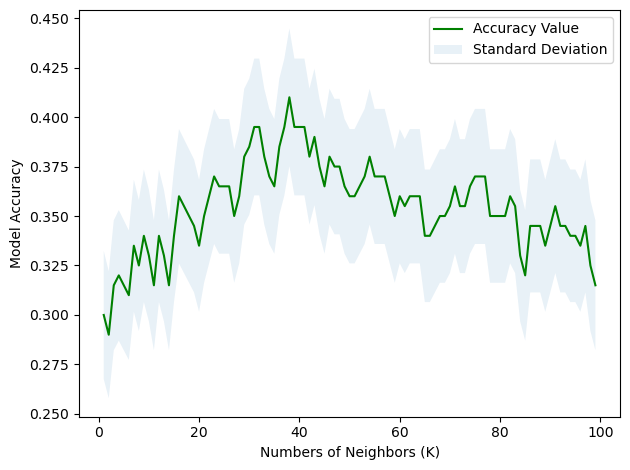

In [32]:
# Plot the model accuracy from 1 -100

plt.plot(range(1, Ks), acc, 'g')
plt.fill_between(range(1, Ks), acc - 1 * std_acc, acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy Value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Numbers of Neighbors (K)')
plt.tight_layout()
plt.show()

The Performance is best when the KNN = 40

Observation:

The reason why there is a downfall slope in the chart is because the 

The K-Nearest Neighbors (KNN) model selects data points that are closest to a given point based on the training data. When K is low (e.g., K = 1), the model fits the training data very well but may perform poorly on test data due to overfitting. On the other hand, when K is high, the model considers a larger neighborhood, making predictions more stable by averaging the surrounding values, which helps prevent overfitting but may lead to underfitting if K is too large.